# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

In [2]:
import mlagents

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [3]:
env = UnityEnvironment(file_name=r"./Banana_Windows_x86_64/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [6]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


When finished, you can close the environment.

In [ ]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

#### Import dependencies

In [6]:
from unityagents import UnityEnvironment
import numpy as np
import mlagents
from DQN_model import *
import matplotlib.pyplot as plt

In [7]:
%load_ext autoreload
%autoreload 2

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#### Set hyperparameters

In [9]:
GAMMA = 0.999
TAU = 0.1
UPDATE_EVERY = 4
BATCH_SIZE = 128
AVG_WINDOW = 10
EPS_start = 0.95
EPS_end = 0.05
EPS_decay = 5000

Below the decay of eps with number of steps is shown. 

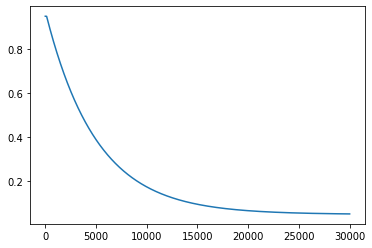

In [10]:
epses = []
t = 0
for i in range(30000):
    if i < BATCH_SIZE:
        eps = EPS_start
    else:
        eps = EPS_end + (EPS_start - EPS_end) *\
                               np.exp(-1.*t/EPS_decay)
        t+= 1        
    epses.append(eps)
plt.plot(np.arange(30000),epses)

#### Build my agent and game

In [26]:
my_agent = Agent(
    state_size=37,
    hidden_size=64,
    action_size=4,
    device=device,
    memory_capacity=6400,
    EPS_start=EPS_start, 
    EPS_end=EPS_end, 
    EPS_decay=EPS_decay,
)

The structure of Agent is shown in DQN_model.py. The core nerual network DQN is a full connected model with 1 hidden layer. The training steps is running in GAME.

In [27]:
my_game = GAME(env, my_agent)

#### Start training

In [28]:
my_game.train(num_episodes = 200,
             UPDATE_EVERY=UPDATE_EVERY,
             GAMMA=GAMMA,
             TAU=TAU,
             AVG_WINDOW = AVG_WINDOW,
             DOUBLE = False)

Epoch:1, the score is 0.0, the total step is 300
Epoch:2, the score is -2.0, the total step is 600
Epoch:3, the score is 0.0, the total step is 900
Epoch:4, the score is 2.0, the total step is 1200
Epoch:5, the score is 1.0, the total step is 1500
Epoch:6, the score is 2.0, the total step is 1800
Epoch:7, the score is 1.0, the total step is 2100
Epoch:8, the score is 3.0, the total step is 2400
Epoch:9, the score is 5.0, the total step is 2700
Epoch:10, the score is 5.0, the total step is 3000, average score is 1.7
Epoch:11, the score is 4.0, the total step is 3300, average score is 2.1
Epoch:12, the score is 7.0, the total step is 3600, average score is 3.0
Epoch:13, the score is 5.0, the total step is 3900, average score is 3.5
Epoch:14, the score is 6.0, the total step is 4200, average score is 3.9
Epoch:15, the score is 2.0, the total step is 4500, average score is 4.0
Epoch:16, the score is 5.0, the total step is 4800, average score is 4.3
Epoch:17, the score is 2.0, the total ste

Epoch:114, the score is 12.0, the total step is 34200, average score is 10.7
Epoch:115, the score is 17.0, the total step is 34500, average score is 10.7
Epoch:116, the score is 5.0, the total step is 34800, average score is 10.2
Epoch:117, the score is 9.0, the total step is 35100, average score is 10.7
Epoch:118, the score is 10.0, the total step is 35400, average score is 10.5
Epoch:119, the score is 3.0, the total step is 35700, average score is 10.2
Epoch:120, the score is 15.0, the total step is 36000, average score is 10.5
Epoch:121, the score is 9.0, the total step is 36300, average score is 10.3
Epoch:122, the score is 15.0, the total step is 36600, average score is 10.5
Epoch:123, the score is 16.0, the total step is 36900, average score is 11.1
Epoch:124, the score is 9.0, the total step is 37200, average score is 10.8
Epoch:125, the score is 8.0, the total step is 37500, average score is 9.9
Epoch:126, the score is 15.0, the total step is 37800, average score is 10.9
Epoch:

Epoch:129, the score is 19.0, the total step is 38700, average score is 13.1

Save model with average score 13.1 at episode 129

Epoch:135, the score is 15.0, the total step is 40500, average score is 13.2 

Save model with average score 13.2 at episode 135

#### Plot of rewords

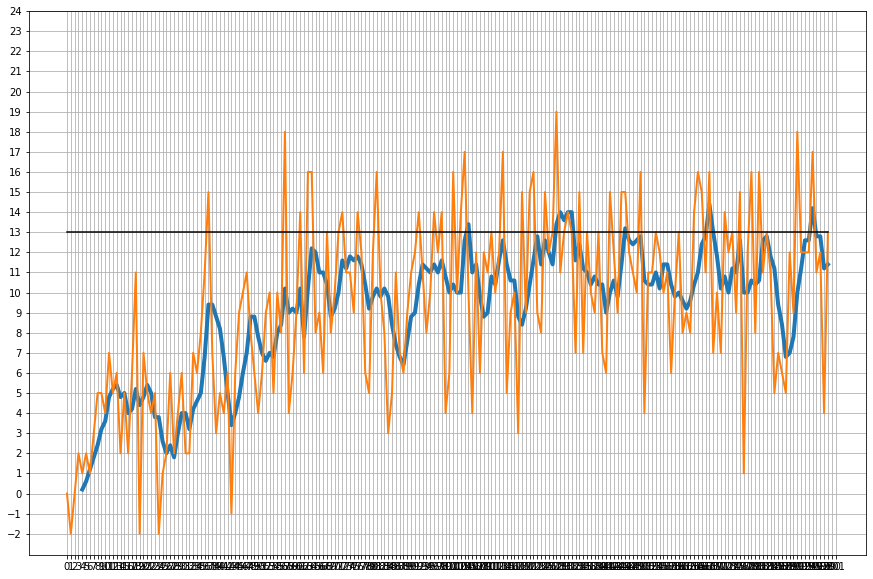

In [29]:
my_game.training_plot()

The plot of rewords is shown as above. At episode 129, the average score (13.1) of last 10 episodes rises to 13. The model with best average score 13.2 is saved as save_model_DQN.pth in folder save_model. The detail can be read in the ouputs above. 

#### DDQN

In [12]:
my_agent_2 = Agent(
    state_size=37,
    hidden_size=64,
    action_size=4,
    device=device,
    memory_capacity=6400,
    EPS_start=EPS_start, 
    EPS_end=EPS_end, 
    EPS_decay=EPS_decay,
)
my_game_2 = GAME(env, my_agent_2)

In [13]:
my_game_2.train(num_episodes = 200,
             UPDATE_EVERY=UPDATE_EVERY,
             GAMMA=GAMMA,
             TAU=TAU,
             AVG_WINDOW = AVG_WINDOW,
             DOUBLE = True)

Epoch:1, the score is 0.0, the total step is 300
Epoch:2, the score is -1.0, the total step is 600
Epoch:3, the score is 2.0, the total step is 900
Epoch:4, the score is -2.0, the total step is 1200
Epoch:5, the score is 1.0, the total step is 1500
Epoch:6, the score is 2.0, the total step is 1800
Epoch:7, the score is 1.0, the total step is 2100
Epoch:8, the score is 0.0, the total step is 2400
Epoch:9, the score is 3.0, the total step is 2700
Epoch:10, the score is 4.0, the total step is 3000, average score is 1.0
Epoch:11, the score is 4.0, the total step is 3300, average score is 1.4
Epoch:12, the score is 0.0, the total step is 3600, average score is 1.5
Epoch:13, the score is 2.0, the total step is 3900, average score is 1.5
Epoch:14, the score is 2.0, the total step is 4200, average score is 1.9
Epoch:15, the score is 2.0, the total step is 4500, average score is 2.0
Epoch:16, the score is 0.0, the total step is 4800, average score is 1.8
Epoch:17, the score is 3.0, the total st

Epoch:113, the score is 11.0, the total step is 33900, average score is 10.7
Epoch:114, the score is 18.0, the total step is 34200, average score is 11.7
Epoch:115, the score is 12.0, the total step is 34500, average score is 12.3
Epoch:116, the score is 6.0, the total step is 34800, average score is 11.4
Epoch:117, the score is 1.0, the total step is 35100, average score is 10.0
Epoch:118, the score is 17.0, the total step is 35400, average score is 11.2
Epoch:119, the score is 11.0, the total step is 35700, average score is 10.6
Epoch:120, the score is 16.0, the total step is 36000, average score is 10.9
Epoch:121, the score is 14.0, the total step is 36300, average score is 11.5
Epoch:122, the score is 12.0, the total step is 36600, average score is 11.8
Epoch:123, the score is 14.0, the total step is 36900, average score is 12.1
Epoch:124, the score is 12.0, the total step is 37200, average score is 11.5
Epoch:125, the score is 11.0, the total step is 37500, average score is 11.4
E

Epoch:67, the score is 14.0, the total step is 20100, average score is 13.4
Save model with average score 13.4 at episode 67

Epoch:96, the score is 19.0, the total step is 28800, average score is 13.9
Save model with average score 13.9 at episode 96

Epoch:186, the score is 11.0, the total step is 55800, average score is 14.1
Save model with average score 14.1 at episode 186

The DDQN (yellow) has a better and more stable result than DQN (blue)

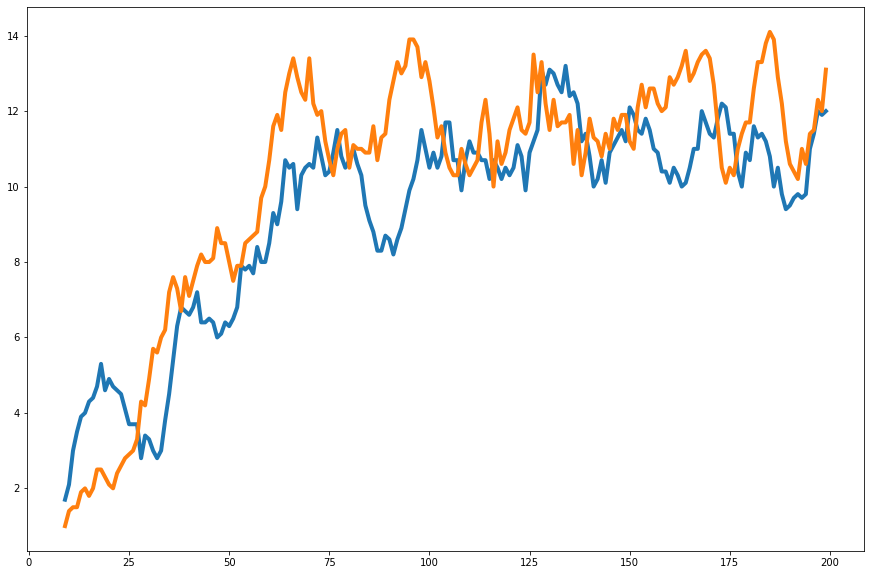

In [17]:
scores_1 = my_game.train_scores
scores_2 = my_game_2.train_scores
win_length= 10
def build_average(scores, win_length):
    win_average = []
    for i in range(len(scores)-win_length+1):
        window = np.mean(scores[i:i+win_length])
        win_average.append(window)
    return win_average
win_average_1 = build_average(scores_1, win_length)
win_average_2 = build_average(scores_2, win_length)

plt.figure(figsize=(15,10))
plt.plot(np.arange(win_length-1,len(scores_1)),win_average_1,linewidth=4)
plt.plot(np.arange(win_length-1,len(scores_2)),win_average_2,linewidth=4)

#### Future work
- A bigger Nerual network with more layers can be tested.
- More episodes